Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
           ds        yhat  yhat_lower  yhat_upper
0  2014-01-31  177.677287  -34.048587  385.123526
1  2014-02-28  124.517861  -86.430937  339.784233
2  2014-03-31  219.796797   10.161639  426.771564
3  2014-04-30  238.484800   36.687546  442.079254
4  2014-05-31  122.754915  -87.874500  341.923158
5  2014-06-30  138.728644  -83.462750  351.314938
6  2014-07-31  202.592438   -0.345742  408.332562
7  2014-08-31  319.896220  100.631438  529.889660
8  2014-09-30  231.378399   18.634357  442.303927
9  2014-10-31  316.810026  103.599326  529.621039
10 2014-11-30   84.933015 -109.706580  294.104990
11 2014-12-31  354.436186  151.573505  575.625241
12 2015-01-31  221.237619   19.207310  428.498176
13 2015-02-28  168.299801  -51.221864  386.519337
14 2015-03-31  264.142086   53.924708  467.792919
15 2015-04-30  282.666785   62.470738  491.697327
16 2015-05-31  165.527623  -50.573322  378.609761
17 2015-06-

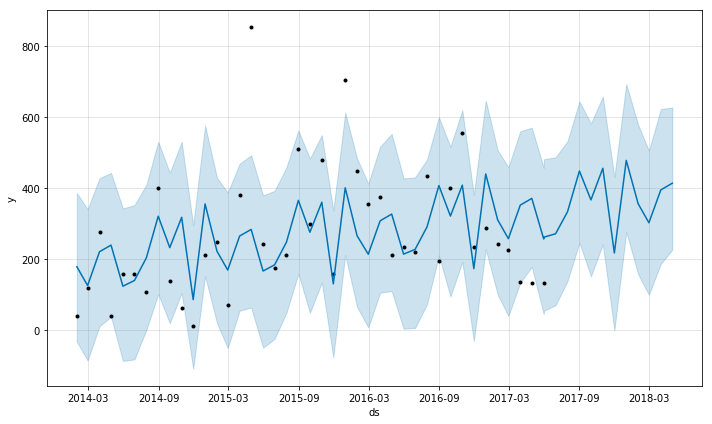

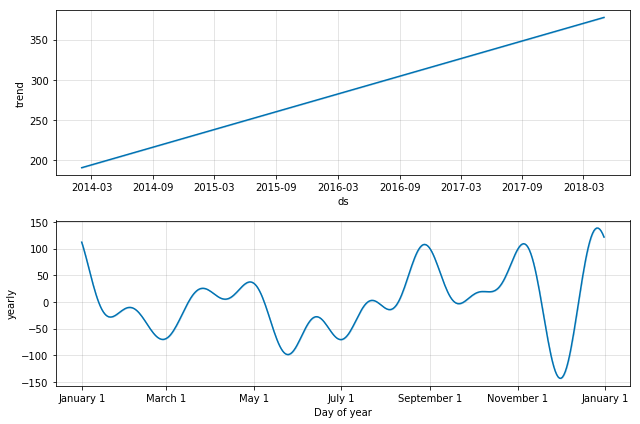

In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
from fbprophet import Prophet

data = pd.read_csv('MissingMigrantsProject.csv', encoding='latin-1')
df = pd.DataFrame(data, columns = ['date','dead'])
df.rename(columns={'date': 'ds',
                   'dead': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])
df.index = df['ds']

df = df.resample('M').sum()

df = df.reset_index()

df = df[:-7]

model = Prophet()
model.fit(df)

future_dates = model.make_future_dataframe(periods=12, freq='MS')

forecast = model.predict(future_dates)

results = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

print(results)

model.plot(forecast, uncertainty=True)

model.plot_components(forecast);
